# Bài toán phân loại sử dụng Naive Bayes 

Mục tiêu: 

- Xây dựng được mô hình nb sử dụng thư viện sklearn. 
- Ứng dụng, hiểu cách áp dụng mô hình nb vào giải quyết bài toán thực tế (vd: phân loại văn bản) 
- Sử dụng độ đo Accuracy để làm độ đo đánh giá chất lượng mô hình. 

Vấn đề: 
- Có một tập các văn bản dạng text không có nhãn, làm sao để biết văn bản này là thuộc về thể loại nào, pháp luật, đời sống, văn học, thể thao ...
- => Xây dựng mô hình học máy có thể phân loại các thể loại của văn bản chỉ dựa trên nội dung.  

Dữ liệu: 
- Có tập các văn bản và nhãn tương ứng của từng văn bản trong một khoảng thời gian 
- Tập các nhãn - 10 nhãn văn bản: 
    > Giải trí, Khoa học - Công nghệ, Kinh tế, Pháp luật, Sức khỏe, Thể thao, Thời sự, Tin khác, Độc giả, Đời sống - Xã hội
- Ví dụ văn bản nhãn **thể thao**: 
    > "Dân_trí Real Madrid đã dẫn trước trong cả trận đấu , nhưng họ vẫn phải chấp_nhận bị Dortmund cầm hòa 2-2 ở Bernabeu . Real Madrid chấp_nhận đứng thứ_hai ở bảng F Champions League ..."

Bài toán: 
- Input: tập các từ trong văn bản 1 mẫu dữ liệu $X = [x_1, x_2, ... x_n]$
- Output: nhãn $y$ là 1 trong 10 nhãn trên 

# Nội dung thực hành

1. Nếu sử dụng GColab, cần kết nối với server và Gdrive(nếu sử dụng dữ liệu trong drive)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ML6

/content/drive/MyDrive/ML6


2. Import các thư viện cần thiết, cài thêm một số thư viện chưa sẵn có

In [ ]:
# Cài đặt thư viện xử lý ngôn ngữ cho tiếng Việt!
!pip install pyvi

     |████████████████████████████████| 8.5 MB 5.1 MB/s 
     |████████████████████████████████| 743 kB 57.6 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#from sklearn.datasets import load_files
from pyvi import ViTokenizer # Tách từ tiếng Việt

from sklearn.metrics import accuracy_score
import sklearn.naive_bayes as naive_bayes
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

%matplotlib inline

3. Load dữ liệu từ thư mục đã crawl từ trước 

>Cấu trúc thư mục như sau 
- data/news_1135/
    - Kinh tế: 
        - bài báo 1.txt 
        - bài báo 2.txt 
    - Pháp luật
        - bài báo 3.txt 
        - bài báo 4.txt 

In [ ]:
data_train = load_files(container_path="data/news_1135/", encoding="utf-8")

print(data_train.filenames[:3])
print()

print("Tong so file: {}" .format( len(data_train.filenames)))
print("Danh sách nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)] )


['data/news_1135/Tin khác/0218e1df21ce358b9c6485176a48f1fcaeedef67.txt'
 'data/news_1135/Khoa học - Công nghệ/bf9889f5f2ffd6c92fa877d35ef0ef5f34f0666d.txt'
 'data/news_1135/Tin khác/d74aab054ffe9f8661df13bc52b438b48a63fe48.txt']

Tong so file: 1135
Danh sách nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự'), (7, 'Tin khác'), (8, 'Đời sống - Xã hội'), (9, 'Độc giả')]


In [ ]:
### bài tập ### 
# yêu cầu: Hiển thị nội dung, và nhãn của văn bản đầu tiên trong tập train. 
# gợi ý: tự làm.  
###############
# code 

print('- Noi dung cua van ban dau tien:', data_train.data[0])
print()

print('- Nhan cua van ban dau tien:', end=' ')
print(data_train.target_names[data_train.target[0]])

# print('- Nội dung của văn bản đầu tiên: ', data_train.data[0])
# print()
# print('- Nhân của văn bản đầu tiên: ', end=' ')
# print(data_train.target_names[data_train,target[0]])

###############

- Noi dung cua van ban dau tien: Dân_trí Sở GD & ĐT tỉnh Gia_Lai vừa ra văn_bản số 2258 / SGDĐT - VP , về việc chấn_chỉnh việc tiếp_thị sách và các vật_dụng khác trong các cơ_sở giáo_dục . Văn_bản chỉ_đạo , tuyệt_đối không cho phép các cá_nhân , tập_thể đến trường tiếp_thị , quảng_cáo mua_bán sách , dụng_cụ học_tập … cho giáo_viên và học_sinh trong nhà_trường . Các tổ_chức , cá_nhân trong ngành giáo_dục tuyệt_đối không được thực_hiện hoặc tham_gia giới_thiệu , quảng_bá , vận_động mua , phát_hành sách tham_khảo tới học_sinh hoặc phụ_huynh dưới hình_thức nào . Nhà_trường tuyệt_đối không được lưu_hành , sử_dụng sách có nội_dung không lành_mạnh , không phù_hợp với nội_dung chương_trình phổ_thông . Trường_hợp phát_hiện sách có sai_sót , các đơn_vị cần báo_cáo với cấp trên để có hướng xử_lý . Các sơ sở giáo_dục đề_cao cảnh_giác đối_với trường_hợp mạo_danh cán_bộ , chuyên_viên sở trong ngành đi giới_thiệu sách , đồ_dùng học_sinh ; công_khai phổ_biến các quy_định trên đến cán_bộ , giáo_viên , 

##  Tiền xử lý dữ liệu đưa dữ liệu từ dạng text về dạng ma trận 

- Thử nghiệm để kiểm tra hoạt động chuyển hoá dữ liệu về dạng ma trận 

In [ ]:
# load dữ liệu các stopwords 
# with open("data/vietnamese-stopwords.txt",encoding="utf8") as f:
#     stopwords = f.readlines()
# stopwords = [x.strip().replace(" ", "_") for x in stopwords] 
# print("Danh sách 10 từ dừng đầu tiên (từ không mang ý nghĩa phân loại): ", stopwords[:10])
# print()

with open ("data/vietnamese-stopwords.txt", encoding="utf8") as f:
    stopwords = f.readlines()
stopwords = [x.strip().replace(" ", "_") for x in stopwords]
print("Danh sách 10 từ dừng đầu tiên (từ không mang ý nghĩa phân loại): ", stopwords[:10])

# 
# Transforming data 
# Chuyển hoá dữ liệu text về dạng vector tfidf 
#     - loại bỏ từ dừng
#     - sinh từ điển
# module_count_vector = CountVectorizer(stop_words=stopwords, min_df=5)
# model_rf_preprocess = Pipeline([('vect', module_count_vector),
#                     ('tfidf', TfidfTransformer()),
#                     ])

module_count_vector = CountVectorizer(stop_words= stopwords, min_df=5)
model_rf_preprocess = Pipeline([('vect', module_count_vector),
                                ('tfidf', TfidfTransformer()),
                                ])

# Hàm thực hiện chuyển đổi dữ liệu text thành dữ liệu số dạng ma trận 
# Input: Dữ liệu 2 chiều dạng numpy.array, mảng nhãn id dạng numpy.array 

# Tiền xử lý với Bag of words
# data_bow = module_count_vector.fit_transform(data_train.data, data_train.target)
# # Tiền xử lý với TF-IDF
# data_tfidf = model_rf_preprocess.fit_transform(data_train.data, data_train.target)
# print('vocab size:', len(module_count_vector.vocabulary_))
# print("10 từ đầu tiên trong từ điển:\n")
# i = 0
# for k,v in module_count_vector.vocabulary_.items():
#     i+=1
#     print(i, ": ", (k, v))
#     if i > 10:
#         break 
# print()

data_bow = module_count_vector.fit_transform(data_train.data, data_train.target)
data_tfidf = model_rf_preprocess.fit_transform(data_train.data, data_train.target)
print('vocab size:', len(module_count_vector.vocabulary_))
print("10 từ đầu tiên trong từ điển:\n")
i=0
for k, v in module_count_vector.vocabulary_.items():
    i+=1
    print(i, ": ", (k, v))
    if i>10:
      break
print()

Danh sách 10 từ dừng đầu tiên (từ không mang ý nghĩa phân loại):  ['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy']
vocab size: 6019
10 từ đầu tiên trong từ điển:

1 :  ('dân_trí', 1424)
2 :  ('sở', 4005)
3 :  ('gd', 1585)
4 :  ('đt', 5608)
5 :  ('tỉnh', 5021)
6 :  ('gia_lai', 1607)
7 :  ('văn_bản', 5238)
8 :  ('vp', 5195)
9 :  ('chấn_chỉnh', 871)
10 :  ('tiếp_thị', 4490)
11 :  ('sách', 3915)



- Acc = 0.8325991189427313
- Acc = 0.8502202643171806
- Acc = 0.8590308370044053
- Acc = 0.8414096916299559
- Acc = 0.8370044052863436


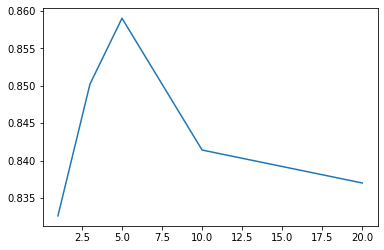

In [ ]:
acc = []
min_dfs = [1, 3, 5, 10, 20]
for min_df in min_dfs:
    module_count_vector = CountVectorizer(stop_words=stopwords, min_df=min_df)
    data_bow = module_count_vector.fit_transform(data_train.data, data_train.target)
    X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(data_bow, data_train.target, test_size=test_size, random_state=30)
    model_MNB = naive_bayes.MultinomialNB(alpha= 0.1)
    model_MNB.fit(X_train_bow, y_train_bow)

    
    y_pred_bow = model_MNB.predict(X_test_bow)
    acc.append(accuracy_score(y_test_bow, y_pred_bow))
    print("- Acc = {}".format(acc[-1]))
    
plt.plot(min_dfs, acc)

# acc = []
# min_dfs = [1,3,5,10,20]
# for min_df in min_dfs:
#     module_count_vector = CountVectorizer(stop_words=stopwords, min_df=min_df)
#     data_bow = module_count_vector.fit_transform(data_train.data, data_train.target)
#     X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(data_bow, data_train.target, test_size= test)

## Chia dữ liệu làm 2 phần training và testing 

- Training chiếm 80 % dữ liệu 
- Testing chiếm 20 % dữ liệu 

In [ ]:
# from sklearn.model_selection import train_test_split

# # chia dữ liệu thành 2 phần sử dụng hàm train_test_split.
# test_size = 0.2
# # Bow
# X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(data_bow, data_train.target, test_size=test_size, random_state=30)
# # Tf-idf
# X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(data_tfidf, data_train.target, test_size=test_size, random_state=30)

from sklearn.model_selection import train_test_split
test_size = 0.2

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(data_bow, data_train.target, test_size=test_size, random_state=30)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(data_tfidf, data_train.target, test_size=test_size, random_state=30)


# hiển thị một số thông tin về dữ liệu 
# print("Dữ liệu training = ", X_train_bow.shape, y_train_bow.shape)
# print("Dữ liệu testing = ", X_test_bow.shape, y_test_bow.shape)

# print() 
# print("Danh sách nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)] )

print("Dữ liệu training = ", X_train_bow.shape, y_train_bow.shape)
print("Dữ liệu testing = ", X_test_bow.shape, y_test_bow.shape)

print()
print("Danh sách nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)])


Dữ liệu training =  (908, 24389) (908,)
Dữ liệu testing =  (227, 24389) (227,)

Danh sách nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự'), (7, 'Tin khác'), (8, 'Đời sống - Xã hội'), (9, 'Độc giả')]


In [ ]:
print(data_train)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
### bài tập ### 
# yêu cầu: Hiển thị ra id, tên nhãn của 5 văn bản đầu tiên trong tập train. 
# gợi ý: lấy dữ liệu id từ biến y_train, mapping với thứ tự nằm trong mảng data_train.target_names
###############
# code 

print('{:2} | {:45}'.format('ID', 'Label name'))
for i in range(5):
  print('{:2} | {:45}'.format(data_train.target[i], data_train.target_names[data_train.target[i]]))

# print('{:2} | {:45}'.format('ID', 'Label name'))
# for i in range(5):
#   print('{:2} | {:45}'.format(data_train.target[i], data_train.target_names[data_train.target[i]]))


###############

ID | Label name                                   
 7 | Tin khác                                    
 1 | Khoa học - Công nghệ                     
 7 | Tin khác                                    
 8 | Đời sống - Xã hội                     
 4 | Sức khỏe                                  


## Training Naive Bayes model 

Sử dụng thư viện sklearn để xây dựng 2 mô hình 
- `naive_bayes.MultinomialNB(alpha= 0.1)`: giá trị làm mịn alpha= 0.1
- `naive_bayes.GaussianNB()`

### Multinomial Naive Bayes
- Sử dụng Bag of words

In [ ]:
print("- Training ...")


# X_train.shape
print("- Train size = {}".format(X_train_bow.shape))
model_MNB = naive_bayes.MultinomialNB(alpha= 0.1)
model_MNB.fit(X_train_bow, y_train_bow)

print("- model_MNB - train complete")

print("- Testing ...")
y_pred_bow = model_MNB.predict(X_test_bow)
print("- Acc = {}".format(accuracy_score(y_test_bow, y_pred_bow)))

# print("- Training ...")

# print("-Train size = {}".format(X_train_bow.shape))
# model_MNB = naive_bayes.MultinomialNB(alpha= 0.1)
# model_MNB.fit(X_train_bow, y_train_bow)
# print("-model_MNB - train complete")

# print('-Testing ...')
# y_pred_bow = model_MNB.predict(X_test_bow)
# print("-Acc = {}".format(accuracy_score(y_test_bow, y_pred_bow)))


- Training ...
- Train size = (908, 1949)
- model_MNB - train complete
- Testing ...
- Acc = 0.8370044052863436


In [ ]:
# print("- Training ...")


# # X_train.shape
# print("- Train size = {}".format(X_train_tfidf.shape))
# model_MNB = naive_bayes.MultinomialNB(alpha= 0.1)
# model_MNB.fit(X_train_tfidf, y_train_bow)

# print("- model_MNB - train complete")
# print("- Testing ...")
# y_pred_tfidf = model_MNB.predict(X_test_tfidf)
# print("- Acc = {}".format(accuracy_score(y_test_tfidf, y_pred_tfidf)))

print(" - Trainig ...")
print("- Train size = {}".format(X_train_tfidf.shape))
model_MNB = naive_bayes,MultinomialNB(alpha = 0.1)
model_MNB.fit(X_train_tfidf, y_train_bow)

print("- model_MNB - train  complete")
print("- Testing ...")
y_pred_tfidf = model_MNB.predict(X_test_tfidf)
print("- ACC = {}".format(accuracy_score(y_test_tfidf, y_pred_tfidf)))

 - Trainig ...


NameError: ignored

### 2.2. Gaussian Naive Bayes
- Sử dụng TF-IDF

In [ ]:
### bài tập ### 
# yêu cầu: huấn luyện một mô hình Gaussian Naive Bayes tương tự như trên
# gợi ý: naive_bayes.GaussianNB(var_smoothing=1e-3)
###############
# code 

print("- Training ...")


# X_train.shape
print("- Train size = {}".format(X_train_tfidf.shape))

model_GNB = naive_bayes.GaussianNB(var_smoothing=1e-3)
model_GNB.fit(X_train_tfidf.toarray(), y_train_tfidf)

print("- model_GNB - train complete")
###################
print("- Testing ...")
y_pred_tfidf = model_GNB.predict(X_test_tfidf.toarray())
print("- Acc = {}".format(accuracy_score(y_test_tfidf, y_pred_tfidf)))

print("- Trainning...")
print("- Train size = {}".format(X_train_tfidf.shape))
model_GNB =naive_bayes.GaussianNb()

- Training ...
- Train size = (908, 24389)
- model_GNB - train complete
- Testing ...
- Acc = 0.7841409691629956


In [ ]:
### bài tập ### 
# yêu cầu: huấn luyện một mô hình Gaussian Naive Bayes tương tự như trên
# gợi ý: naive_bayes.GaussianNB(var_smoothing=1e-3)
###############
# code 

print("- Training ...")


# X_train.shape
print("- Train size = {}".format(X_train_bow.shape))

model_GNB = naive_bayes.GaussianNB(var_smoothing=1e-3)
model_GNB.fit(X_train_bow.toarray(), y_train_bow)

print("- model_GNB - train complete")
###################
print("- Testing ...")
y_pred_bow = model_GNB.predict(X_test_bow.toarray())
print("- Acc = {}".format(accuracy_score(y_test_bow, y_pred_bow)))

- Training ...
- Train size = (908, 24389)
- model_GNB - train complete
- Testing ...
- Acc = 0.748898678414097


## Testing Naive Bayes model 


Thực hiện dự đoán nhãn cho từng văn bản trong tập test 

Độ đo đánh giá: 
> accuracy = tổng số văn bản dự đoán đúng  / tổng số văn bản có trong tập test  

In [ ]:
# Sử dụng thư viện tính accuracy_score trong sklearn
from sklearn.metrics import accuracy_score

In [ ]:
print("- Testing ...")
y_pred_bow = model_MNB.predict(X_test_bow)
print("- Acc = {}".format(accuracy_score(y_test_bow, y_pred_bow)))

- Testing ...
- Acc = 0.8678414096916299


In [ ]:
#Test tương tự cho GNB?
print("- Testing ...")
y_pred_tfidf = model_GNB.predict(X_test_tfidf.toarray())
print("- Acc = {}".format(accuracy_score(y_test_tfidf, y_pred_tfidf)))

- Testing ...
- Acc = 0.7841409691629956


## 5. Thực hiện sử dụng model đã được train để infer 1 văn bản mới 
- Dữ liệu mới đến ở dạng dữ liệu thô => cần tiền xử lý dữ liệu về dạng dữ_liệu_ma_trận
- infer sử dụng hàm model.predict(dữ_liệu_ma_trận) 

In [ ]:
a = ViTokenizer.tokenize("Trường đại học bách khoa hà nội")
print(a)

Trường đại_học bách_khoa hà_nội


In [ ]:
# tiền xử lý dữ liệu sử dụng module module_count_vector. 
van_ban_moi = ViTokenizer.tokenize("Công Phượng ghi bàn cho đội tuyển Việt Nam")
#van_ban_moi = ["Công_phượng ghi_bàn cho đội_tuyển Việt_nam"]
print(van_ban_moi)
input_data_preprocessed = module_count_vector.transform([van_ban_moi])
print(input_data_preprocessed)

print()
print("Danh sách nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)] )



Công Phượng ghi_bàn cho đội_tuyển Việt_Nam
  (0, 5847)	1
  (0, 7777)	1
  (0, 15553)	1
  (0, 21498)	1
  (0, 24149)	1

Danh sách nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự'), (7, 'Tin khác'), (8, 'Độc giả'), (9, 'Đời sống - Xã hội')]


In [ ]:
### bài tập ### 
# yêu cầu: dự đoán nhãn của 1 văn bản mới. Sử dụng mô hình Multinomial NB
# gợi ý: thực hiện code suy diễn mô hình từ tiền xử lý (bước 1) => infer (bước 4). (Chú ý: không training lại - ko gọi lại hàm fit.)  
###############
# code 

y_pred = model_MNB.predict(input_data_preprocessed)
print(y_pred, data_train.target_names[y_pred[0]])

###############

[5] Thể thao


## Quan sát độ chính xác trên tập test của GNB khi thay đổi tham số var_smoothing

In [ ]:
# code #####

var_smoothings = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
accs = []

for var_smoothing in var_smoothings:
  model_GNB = naive_bayes.GaussianNB(var_smoothing=var_smoothing)
  model_GNB.fit  (X_train_tfidf.toarray(), y_train_tfidf)
  
  #Hoàn thiện thêm phần code ở đây để ghi nhận acc tương ứng trong từng trường hợp
  y_pred_tfidf = model_GNB.predict(X_test_tfidf.toarray())
  acc = accuracy_score(y_test_tfidf, y_pred_tfidf)
  accs.append(acc)

#Minh họa tương quan bằng đồ thị::
#Gợi ý: barplot, lineplot, ...

import seaborn as sns
sns.lineplot(x=var_smoothings, y = accs)

############

for i in range(len(accs)):
  print(var_smoothings[i], accs[i])

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

10 0.7973568281938326
1 0.8590308370044053
0.1 0.8678414096916299
0.01 0.8722466960352423
0.001 0.8766519823788547
0.0001 0.8546255506607929
1e-05 0.8590308370044053


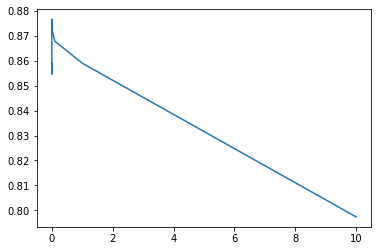

In [ ]:
# code #####

alphas = [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
accs = []

for alpha in alphas:
  model_MNB = naive_bayes.MultinomialNB(alpha=alpha)
  model_MNB.fit(X_train_bow.toarray(), y_train_bow)
  
  #Hoàn thiện thêm phần code ở đây để ghi nhận acc tương ứng trong từng trường hợp
  y_pred_bow = model_MNB.predict(X_test_bow.toarray())
  acc = accuracy_score(y_test_bow, y_pred_bow)
  accs.append(acc)

#Minh họa tương quan bằng đồ thị::
#Gợi ý: barplot, lineplot, ...

import seaborn as sns
sns.lineplot(x=alphas, y = accs)

############

for i in range(len(accs)):
  print(alphas[i], accs[i])